In [2]:
from utils.read_datasetBreakfast import load_data, read_mapping_dict
import os
import numpy as np


COMP_PATH = ''

''' 
training to load train set
test to load test set
'''
split = 'training'
#split = 'test'
test_split  =  os.path.join(COMP_PATH, 'splits/val.split1.bundle') #Test Split
GT_folder   =  os.path.join(COMP_PATH, 'groundTruth/') #Ground Truth Labels for each training video 
DATA_folder =  os.path.join(COMP_PATH, 'Data/') #Frame I3D features for all videos
mapping_loc =  os.path.join(COMP_PATH, 'splits/mapping_bf.txt') 

actions_dict = read_mapping_dict(mapping_loc)

data_feat, data_labels = load_data( test_split, actions_dict, GT_folder, DATA_folder, datatype = split) #G

Finish Load the Training data and labels!!!


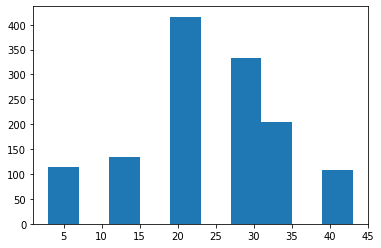

In [13]:
import torch
from Dataset.VideoDataset import VideoDataset
import torch.utils.data as tud
from Models.LSTM import LSTM_Model
from matplotlib import pyplot as plt 
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

model = LSTM_Model().double()
model.load_state_dict(torch.load('./trained/lstm.pt'))
model.eval()

dataset = VideoDataset(data_feat, data_labels)
dataloader = tud.DataLoader(dataset, shuffle=False)
predict_labels = []
with torch.no_grad():
    for in_feature, labels in dataloader:
        output = model(in_feature)
        label_predict = torch.max(output, 1)[1]
        predict_labels.append(label_predict.item())
        
predict_labels = np.asarray(predict_labels)

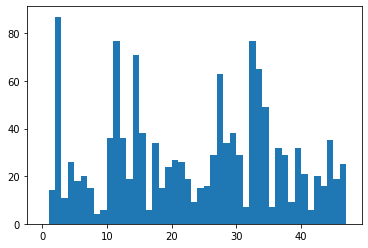

In [40]:
test = np.asarray(predict_labels)
plt.hist(data_labels, bins=range(0,48))
plt.show()

In [41]:
train_split  =  os.path.join(COMP_PATH, 'splits/dev_train.split1.bundle') #Test Split
data_feat, data_labels = load_data( train_split, actions_dict, GT_folder, DATA_folder, datatype = split) #G

Finish Load the Training data and labels!!!


In [52]:
import random

def balance_data(data_feat, data_labels):
    label_dict = {}
    for i in range(len(data_labels)):
        if data_labels[i] not in label_dict.keys():
            label_dict[data_labels[i]] = [data_feat[i]]
        else:
            label_dict[data_labels[i]].append(data_feat[i])
    class_num = len(label_dict.keys())
    avg_len = int(len(data_labels) / class_num)

    new_data_feat = []
    new_data_labels = []
    for k in label_dict.keys():
        if len(label_dict[k]) < avg_len:
            multiplier = int(avg_len/len(label_dict[k])) + 1
            label_dict[k] = label_dict[k] * multiplier
        random.shuffle(label_dict[k])
        new_data_feat.extend(label_dict[k][:avg_len])
        new_data_labels.extend([k] * avg_len)
    return new_data_feat, new_data_labels

859
820
820
torch.Size([181, 400])


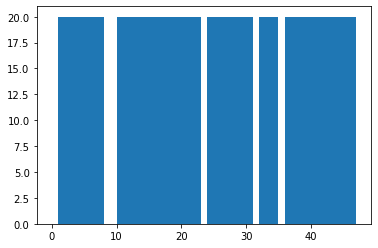

In [55]:
#import utils.balance_data as b
test1, test2 = balance_data(data_feat, data_labels)
print(len(data_feat))
print(len(test1))
print(len(test2))
print(test1[0].shape)
abc = np.asarray(test2)
plt.hist(abc, bins=range(0,48))
plt.show()

In [79]:
import torch.nn.utils as u
print(data_feat[0].shape)
print(data_feat[1].shape)
print(data_feat[2].shape)
a= [data_feat[0], data_feat[1], data_feat[2]]
b = u.rnn.pad_sequence(a, batch_first=True)
print(b.shape)
print(b[0].shape)
print(b[0])

torch.Size([260, 400])
torch.Size([205, 400])
torch.Size([328, 400])
torch.Size([3, 328, 400])
torch.Size([328, 400])
tensor([[-18.6309,   5.0323,  -3.4568,  ...,  -2.5323,  -4.2312,  -7.8478],
        [-20.1714,   6.4342,  -2.4734,  ...,  -1.8793,  -4.3813, -10.2211],
        [-19.4268,   6.6107,  -2.6361,  ...,  -1.9418,  -4.8028, -10.2391],
        ...,
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],
       dtype=torch.float64)
